In [1]:
import pandas as pd
from pathlib import Path

In [12]:
# DATASET = "zappos"
DATASET = "strange_fruit"
# NOISE_MODEL = "CKL"
NOISE_MODEL = "TSTE"
# NOISE_MODEL = "STE"
d = 2

# DATA_DIR = Path(f"cluster-data-score-rev_probs/")
DATA_DIR = Path(f"cluster-data-rev_score-probs-strange-fruit")
# DATA_DIR = Path(f"cluster-data-score-probs")
# DATA_DIR = Path(f"cluster-data-score-probs-strange-fruit/")

dfs = [pd.read_parquet(f) for f in DATA_DIR.glob("*.parquet")]
print(len(dfs))
dfs = [
    df
    for df in dfs
    if (
        df.loc[0, "noise_model"] == NOISE_MODEL
        and df.loc[0, "d"] == d
        and df.loc[0, "dataset"] == DATASET
    )
]
print(len(dfs))

df = pd.concat(dfs)
print(df.dataset.unique(), df.noise_model.unique(), df.d.unique())
df.acc.max()
df.columns

60
10
['strange_fruit'] ['TSTE'] [2]


Index(['acc', 'embedding_max', 'pf_time', 'n', 'd', 'R', 'dataset',
       'max_queries', 'n_partial_fit', 'n_search', 'n_test', 'noise_model',
       'queries_per_search', 'random_state', 'verbose', 'write', 'sampling',
       'optimizer', 'optimizer__lr', 'optimizer__momentum', 'module__alpha',
       'num_ans', 'model_updates', 'process_answers_calls'],
      dtype='object')

In [13]:
df.n_search.unique()

array([ 10000,    300,     30, 100000,   1000,   3000,  30000, 300000,
          100,     10])

In [14]:
df.columns

Index(['acc', 'embedding_max', 'pf_time', 'n', 'd', 'R', 'dataset',
       'max_queries', 'n_partial_fit', 'n_search', 'n_test', 'noise_model',
       'queries_per_search', 'random_state', 'verbose', 'write', 'sampling',
       'optimizer', 'optimizer__lr', 'optimizer__momentum', 'module__alpha',
       'num_ans', 'model_updates', 'process_answers_calls'],
      dtype='object')

In [15]:
import numpy as np
np.sort(df.n_search.unique())

array([    10,     30,    100,    300,   1000,   3000,  10000,  30000,
       100000, 300000])

In [16]:
df["log_n_search"] = np.log10(df.n_search)

In [17]:
df["queries_searched_per_user"] = df["n_search"] / df["queries_per_search"]

In [18]:
df["queries_searched_per_user"].unique()

array([1.e+03, 3.e+01, 3.e+00, 1.e+04, 1.e+02, 3.e+02, 3.e+03, 3.e+04,
       1.e+01, 1.e+00])

In [19]:
df.columns

Index(['acc', 'embedding_max', 'pf_time', 'n', 'd', 'R', 'dataset',
       'max_queries', 'n_partial_fit', 'n_search', 'n_test', 'noise_model',
       'queries_per_search', 'random_state', 'verbose', 'write', 'sampling',
       'optimizer', 'optimizer__lr', 'optimizer__momentum', 'module__alpha',
       'num_ans', 'model_updates', 'process_answers_calls', 'log_n_search',
       'queries_searched_per_user'],
      dtype='object')

In [20]:
df.n.unique()

array([100])

In [21]:
import altair as alt
alt.data_transformers.disable_max_rows()

show = df.copy()

mul = 2
n_search = [mul * 10 ** i for i in range(0, 10)]
n_search = [10] + n_search
print(n_search)
# n_search = show.n_search.unique()

show = df.copy()
print(show.n_search.unique())
# show = show[show.n_search.isin(n_search)]
print(show.n_search.unique())
# show = show[show.num_ans <= 10_000]
show["accuracy"] = show["acc"] * 100

# y = "rank_diff_p70"
y = "accuracy"
print(show.columns)
idx = show[y] <= 0
show.loc[idx, y] = np.nan

w = 200
alt.Chart(show, title="Search efficacy").mark_line(clip=True).encode(
    x=alt.X("num_ans", scale=alt.Scale(zero=False), axis=alt.Axis(title='Answers received')),
#     y=alt.Y("accuracy", scale=alt.Scale(zero=False), axis=alt.Axis(title='Test accuracy (%)')),
    y=alt.Y(
        y,
        scale=alt.Scale(zero=False, type="linear"),
        axis=alt.Axis(title='Test accuracy (%)'),
    ),
    color=alt.Color(
        "queries_searched_per_user:N",
        scale=alt.Scale(scheme='viridis', type="log"),
        title="Queries searched",
    ),
).properties(
    width=3 * w,
    height=1.5 * w,
)

# Colormaps: https://vega.github.io/vega/docs/schemes/

[10, 2, 20, 200, 2000, 20000, 200000, 2000000, 20000000, 200000000, 2000000000]
[ 10000    300     30 100000   1000   3000  30000 300000    100     10]
[ 10000    300     30 100000   1000   3000  30000 300000    100     10]
Index(['acc', 'embedding_max', 'pf_time', 'n', 'd', 'R', 'dataset',
       'max_queries', 'n_partial_fit', 'n_search', 'n_test', 'noise_model',
       'queries_per_search', 'random_state', 'verbose', 'write', 'sampling',
       'optimizer', 'optimizer__lr', 'optimizer__momentum', 'module__alpha',
       'num_ans', 'model_updates', 'process_answers_calls', 'log_n_search',
       'queries_searched_per_user', 'accuracy'],
      dtype='object')


alt.Chart(...)

In [22]:
df.columns

Index(['acc', 'embedding_max', 'pf_time', 'n', 'd', 'R', 'dataset',
       'max_queries', 'n_partial_fit', 'n_search', 'n_test', 'noise_model',
       'queries_per_search', 'random_state', 'verbose', 'write', 'sampling',
       'optimizer', 'optimizer__lr', 'optimizer__momentum', 'module__alpha',
       'num_ans', 'model_updates', 'process_answers_calls', 'log_n_search',
       'queries_searched_per_user'],
      dtype='object')

In [59]:
import altair as alt

show = df.copy()
y = "rank_diff_max"
y = "rank_diff_median"

w = 200
alt.Chart(show, title="Search efficacy").mark_line(clip=True).encode(
    x=alt.X("num_ans", scale=alt.Scale(zero=False), axis=alt.Axis(title='Answers received')),
    y=alt.Y(y, scale=alt.Scale(zero=False, type="linear")),
    color=alt.Color(
        "queries_searched_per_user:N",
        scale=alt.Scale(scheme='viridis', type="log"),
        title="Queries searched",
    ),
).properties(
    width=3 * w,
    height=1.5 * w,
)

# Colormaps: https://vega.github.io/vega/docs/schemes/

alt.Chart(...)

Text(0, 0.5, 'Answers required')

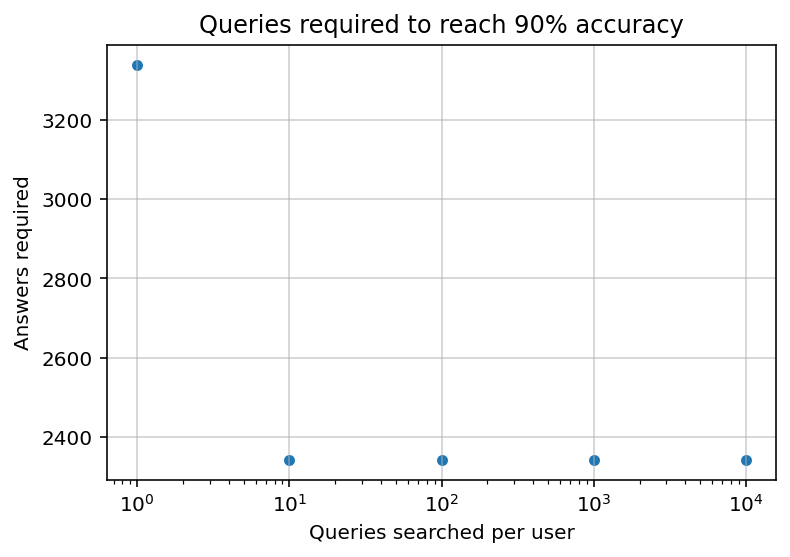

In [60]:
def ans_required(df, acc=0.65):
    valid = df[df.acc >= acc]
    return valid["num_ans"].min()

out = []
acc = 0.90
for n in show.queries_searched_per_user.unique():
    ans = ans_required(show[show.queries_searched_per_user == n], acc=acc)
    datum = {"answers": ans, "n_search": n, "acc": acc}
    out.append(datum)

plot = pd.DataFrame(out)
ax = plot.plot.scatter(x="n_search", y="answers", style="o-")
ax.set_xscale("log")
ax.grid(alpha=0.6)
ax.set_title(f"Queries required to reach {acc * 100:0.0f}% accuracy")
ax.set_xlabel("Queries searched per user")
ax.set_ylabel("Answers required")

In [45]:
df.n.unique()

array([100])

In [46]:
df.R.unique()

array([10])

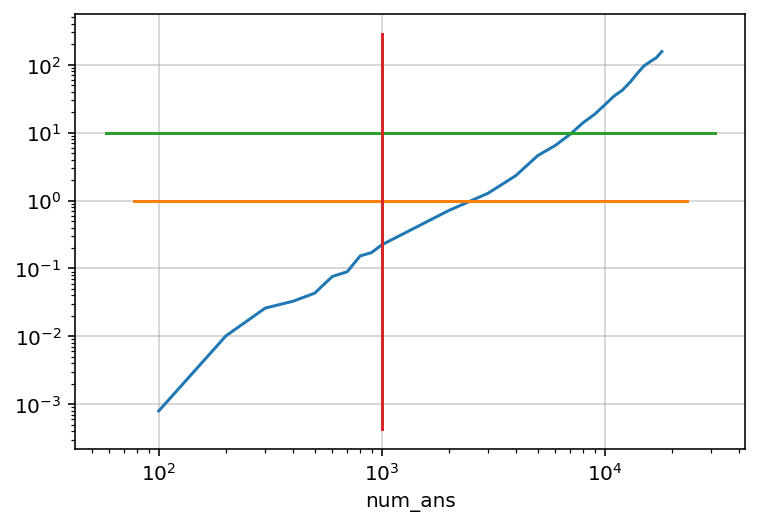

In [47]:
ax = df.groupby("num_ans")["pf_time"].median().plot()
ax.set_yscale("log")
ax.set_xscale("log")
ax.plot(ax.get_xlim(), [1, 1])
ax.plot(ax.get_xlim(), [10, 10])

lim = df.n.unique() * df.R.unique()
ax.plot([lim, lim], ax.get_ylim())
ax.grid(alpha=0.6)